In [ ]:
# Milk sales peak in the morning due to breakfast consumption, lunchboxes, and coffee. They dip mid-morning and lunchtime, 
# then rise slightly in the afternoon for snacks and baking. 
# Late evening sees another small rise for dinners and bedtime drinks, before falling again at night.

In [1]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

Sales Data

In [2]:
d_trend = {
    "morning": 40,
    "mid_morning": 10,
    "lunchtime": 5,
    "afternoon": 10,
    "late_evening": 25,
    "night": 10
    }

# 100-200 liter per day 
# 45-60 rupees per liter

m_trend = {
    "Winter": {"peak": 0.8, "dip": 0.2},
    "Spring": {"peak": 0.4, "dip": 0.4},
    "Summer": {"peak": 0.2, "dip": 0.6},
    "Fall": {"peak": 0.3, "dip": 0.5},
}

sale=random.randint(100, 200)
print(sale)


124


In [3]:
import random
import pandas as pd

# Define the trend of milk sales throughout the day
sales_trend = {
    "morning": {"peak": 0.8, "dip": 0.2},
    "mid_morning": {"peak": 0.4, "dip": 0.4},
    "lunchtime": {"peak": 0.2, "dip": 0.6},
    "afternoon": {"peak": 0.3, "dip": 0.5},
    "late_evening": {"peak": 0.6, "dip": 0.2},
    "night": {"peak": 0.2, "dip": 0.5}
}

# Define the seasonal trends
throughout_year_trend = {
    "Summer": {"morning": 0.4, "mid_morning": 0.3, "lunchtime": 0.3, "afternoon": 0.2, "late_evening": 0.4, "night": 0.2},
    "Spring": {"morning": 0.2, "mid_morning": 0.2, "lunchtime": 0.2, "afternoon": 0.1, "late_evening": 0.2, "night": 0.2},
    "Fall": {"morning": 0.3, "mid_morning": 0.4, "lunchtime": 0.4, "afternoon": 0.3, "late_evening": 0.3, "night": 0.2},
    "Winter": {"morning": 0.6, "mid_morning": 0.5, "lunchtime": 0.5, "afternoon": 0.4, "late_evening": 0.6, "night": 0.3}
}


seasonal_trend = throughout_year_trend

# Define price range of milk per liter (in rupees)
min_price ,max_price = 45,60
# max_price = 60

# Initialize an empty list to store the generated data
data = []

# Generate random milk sales data for 1000 days
for day in range(1, 1001):
    for season in ["Winter", "Spring", "Summer", "Fall"]:
        # Determine the price of milk based on seasonal demand
        if season in ["Summer", "Winter"]:
            price = random.randint(min_price, max_price - 5)  # Lower price during peak demand seasons
        else:
            price = random.randint(min_price + 5, max_price)  # Higher price during off-peak seasons
        
        for time_period, probabilities in sales_trend.items():
            # Determine the peak or dip for this time period based on the season
            is_peak = random.random() < (probabilities["peak"] * seasonal_trend[season][time_period])
            is_dip = random.random() < (probabilities["dip"] * seasonal_trend[season][time_period])
            
            # Generate sales based on the peak or dip probabilities
            if is_peak and not is_dip:
                # Peak sales
                units_sold = random.randint(80, 100)  # Adjust the range of sales as needed
            elif not is_peak and is_dip:
                # Dip sales
                units_sold = random.randint(0, 20)  # Adjust the range of sales as needed
            else:
                # Normal sales
                units_sold = random.randint(30, 50)  # Adjust the range of sales as needed
            
            # Append the sales data to the list
            data.append({"Day": f"Day {day}", "Time Period": time_period, "Units Sold": units_sold, "Season": season, "Price per Liter": price})

# Create a DataFrame from the generated data
sales_df = pd.DataFrame(data)

# Display the generated DataFrame
print(sales_df)


            Day   Time Period  Units Sold  Season  Price per Liter
0         Day 1       morning          80  Winter               46
1         Day 1   mid_morning          39  Winter               46
2         Day 1     lunchtime          33  Winter               46
3         Day 1     afternoon          47  Winter               46
4         Day 1  late_evening          81  Winter               46
...         ...           ...         ...     ...              ...
23995  Day 1000   mid_morning          48    Fall               57
23996  Day 1000     lunchtime           3    Fall               57
23997  Day 1000     afternoon          38    Fall               57
23998  Day 1000  late_evening          40    Fall               57
23999  Day 1000         night          43    Fall               57

[24000 rows x 5 columns]


In [22]:
import pandas as pd

# Assuming your dataframe is named 'sales_df2'
df = sales_df.copy()

# Create a datetime index starting from January 1st, 2019 with appropriate length
date_index = pd.date_range(start='2019-01-01', periods=len(df), freq='D')

# Set the index of the dataframe to the new date index
df = df.set_index(date_index)

# Optionally, rename the index if needed
df.index.names = ['Date']  # or any other preferred name

df.drop('Day', axis=1, inplace=True)
print(df)

             Time Period  Units Sold  Season  Price per Liter
Date                                                         
2019-01-01       morning          80  Winter               46
2019-01-02   mid_morning          39  Winter               46
2019-01-03     lunchtime          33  Winter               46
2019-01-04     afternoon          47  Winter               46
2019-01-05  late_evening          81  Winter               46
...                  ...         ...     ...              ...
2084-09-11   mid_morning          48    Fall               57
2084-09-12     lunchtime           3    Fall               57
2084-09-13     afternoon          38    Fall               57
2084-09-14  late_evening          40    Fall               57
2084-09-15         night          43    Fall               57

[24000 rows x 4 columns]


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24000 entries, 2019-01-01 to 2084-09-15
Freq: D
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Time Period      24000 non-null  object
 1   Units Sold       24000 non-null  int64 
 2   Season           24000 non-null  object
 3   Price per Liter  24000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 937.5+ KB


In [24]:
# df.index.strftime('%Y-%m')

In [25]:
tdf = pd.DataFrame(df.groupby(df.index).sum()['Units Sold'])
tdf.columns=['Value']

In [26]:
tdf

,Value
Date,
2019-01-01,80
2019-01-02,39
2019-01-03,33
2019-01-04,47
2019-01-05,81
...,...
2084-09-11,48
2084-09-12,3
2084-09-13,38


In [27]:
newdf=pd.DataFrame()
newdf['y']=tdf['Value']
newdf['ds']= pd.to_datetime(tdf.index)
newdf

,y,ds
Date,,
2019-01-01,80,2019-01-01
2019-01-02,39,2019-01-02
2019-01-03,33,2019-01-03
2019-01-04,47,2019-01-04
2019-01-05,81,2019-01-05
...,...,...
2084-09-11,48,2084-09-11
2084-09-12,3,2084-09-12
2084-09-13,38,2084-09-13


In [28]:
from prophet import Prophet
model = Prophet()

In [29]:
model.fit(newdf)

20:17:27 - cmdstanpy - INFO - Chain [1] start processing
20:17:31 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
future = model.make_future_dataframe(periods=100,freq='D')
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,42.849300,16.020110,68.131924,42.849300,42.849300,0.449644,0.449644,0.449644,-0.309150,-0.309150,-0.309150,0.758795,0.758795,0.758795,0.0,0.0,0.0,43.298944
1,2019-01-02,42.849304,18.314389,71.893741,42.849304,42.849304,1.012303,1.012303,1.012303,0.284378,0.284378,0.284378,0.727925,0.727925,0.727925,0.0,0.0,0.0,43.861606
2,2019-01-03,42.849307,17.945882,68.872987,42.849307,42.849307,0.729164,0.729164,0.729164,0.034459,0.034459,0.034459,0.694705,0.694705,0.694705,0.0,0.0,0.0,43.578472
3,2019-01-04,42.849311,17.554881,70.298261,42.849311,42.849311,0.585923,0.585923,0.585923,-0.074011,-0.074011,-0.074011,0.659934,0.659934,0.659934,0.0,0.0,0.0,43.435234
4,2019-01-05,42.849315,17.563359,69.865255,42.849315,42.849315,0.805456,0.805456,0.805456,0.181001,0.181001,0.181001,0.624455,0.624455,0.624455,0.0,0.0,0.0,43.654771


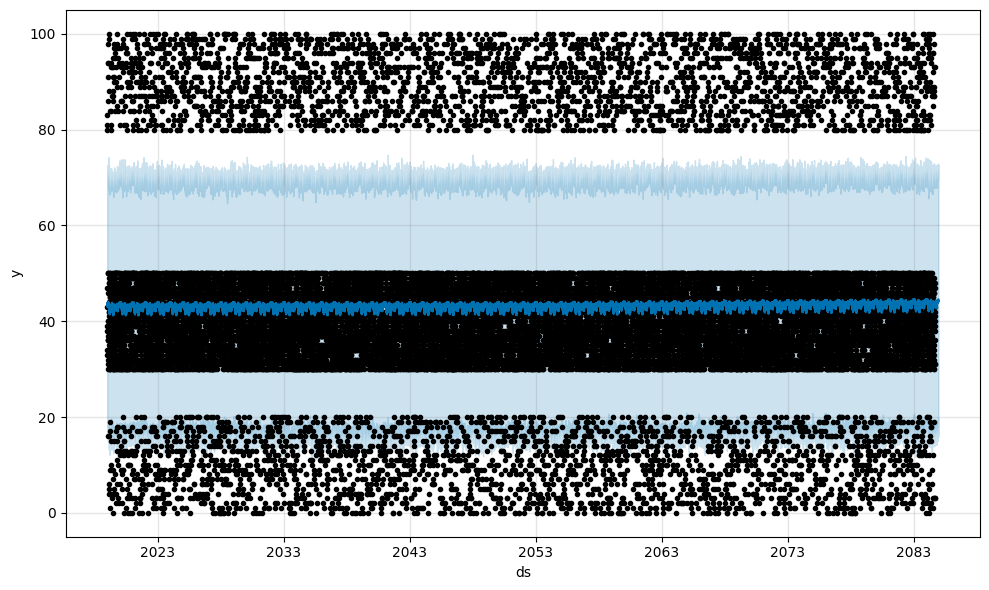

In [31]:
plot1 = model.plot(forecast)

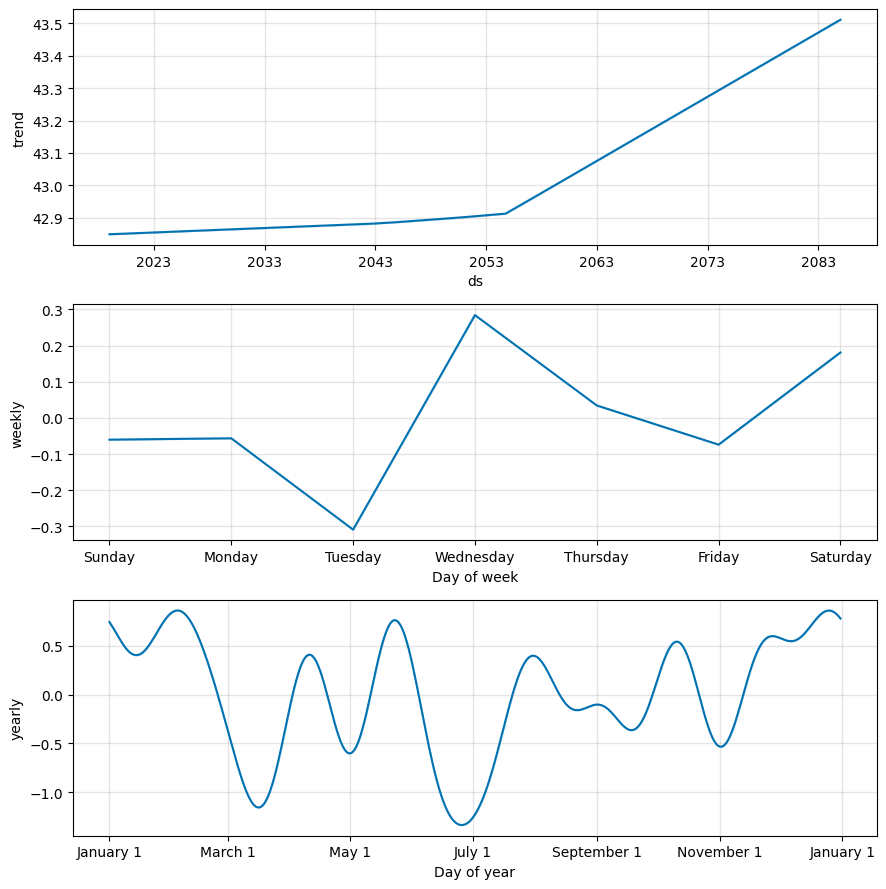

In [32]:
plt2 = model.plot_components(forecast)

In [ ]:
#order
sales_df2=sales_df
custom_order_time = ["morning", "mid_morning", "lunchtime", "afternoon", "late_evening", "night"]
custom_order_season = ["Summer", "Spring", "Fall", "Winter"]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

#graphs for 'Units Sold' on top subplots
ax1.bar(custom_order_time, sales_df2.groupby('Time Period')['Units Sold'].sum().loc[custom_order_time], color='skyblue', label='Bar Chart')
ax1.plot(custom_order_time, sales_df2.groupby('Time Period')['Units Sold'].sum().loc[custom_order_time], marker='o', color='orange', linewidth=2, label='Frequency Polygon')
ax1.set_title('Milk Sales by Time Period')
ax1.set_xlabel('Time Period')
ax1.set_ylabel('Units Sold')
ax1.set_xticklabels(custom_order_time, rotation=45, ha='right')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2.bar(custom_order_season, sales_df2.groupby('Season')['Units Sold'].sum().loc[custom_order_season], color='skyblue', label='Bar Chart')
ax2.plot(custom_order_season, sales_df2.groupby('Season')['Units Sold'].sum().loc[custom_order_season], marker='o', color='orange', linewidth=2, label='Frequency Polygon')
ax2.set_title('Milk Sales by Season')
ax2.set_xlabel('Season')
ax2.set_ylabel('Units Sold')
ax2.set_xticklabels(custom_order_season, rotation=45, ha='right')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

#graphs for 'Price per Liter' on bottom subplots
ax3.bar(custom_order_time, sales_df2.groupby('Time Period')['Price per Liter'].sum().loc[custom_order_time], color='skyblue', label='Bar Chart')
ax3.plot(custom_order_time, sales_df2.groupby('Time Period')['Price per Liter'].sum().loc[custom_order_time], marker='o', color='orange', linewidth=2, label='Frequency Polygon')
ax3.set_title('Milk Rates by Time Period')
ax3.set_xlabel('Time Period')
ax3.set_ylabel('Price per Liter')
ax3.set_xticklabels(custom_order_time, rotation=45, ha='right')
ax3.grid(axis='y', linestyle='--', alpha=0.7)

ax4.bar(custom_order_season, sales_df2.groupby('Season')['Price per Liter'].sum().loc[custom_order_season], color='skyblue', label='Bar Chart')
ax4.plot(custom_order_season, sales_df2.groupby('Season')['Price per Liter'].sum().loc[custom_order_season], marker='o', color='orange', linewidth=2, label='Frequency Polygon')
ax4.set_title('Milk Rates by Season')
ax4.set_xlabel('Season')
ax4.set_ylabel('Price per Liter')
ax4.set_xticklabels(custom_order_season, rotation=45, ha='right')
ax4.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
df = pd.read_csv('df.csv',parse_dates=True,index_col='date')

In [ ]:
df

In [ ]:
df.groupby(df.index.strftime("%Yxoxo%m")).sum()['balance']

In [ ]:
df = pd.DataFrame(df.groupby(df.index.strftime('%Y-%m')).sum()['amount'])
df.columns=['Value']

In [ ]:
df

In [ ]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','Number of Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary \n")

In [ ]:

def MA(q,res):

  for i in range(1,q+1):
    res['Shifted_values_%d' % i ] = res['Residuals'].shift(i)

  train_size = (int)(0.8 * res.shape[0])

  res_train = pd.DataFrame(res[0:train_size])
  res_test = pd.DataFrame(res[train_size:res.shape[0]])

  res_train_2 = res_train.dropna()
  X_train = res_train_2.iloc[:,1:].values.reshape(-1,q)
  y_train = res_train_2.iloc[:,0].values.reshape(-1,1)

  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(X_train,y_train)

  theta  = lr.coef_.T
  intercept = lr.intercept_
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
  # res_train_2[['Residuals','Predicted_Values']].plot()

  X_test = res_test.iloc[:,1:].values.reshape(-1,q)
  res_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_
  res_test[['Residuals','Predicted_Values']].plot()

  from sklearn.metrics import mean_squared_error
  RMSE = np.sqrt(mean_squared_error(res_test['Residuals'], res_test['Predicted_Values']))

  print("The RMSE is :", RMSE,", Value of q : ",q)
  return [res_train_2,res_test,theta,intercept,RMSE]

In [ ]:
def AR(p,df):
  df_temp = df

  #Generating the lagged p terms
  for i in range(1,p+1):
    df_temp['Shifted_values_%d' % i ] = df_temp['Value'].shift(i)

  train_size = (int)(0.8 * df_temp.shape[0])

  #Breaking data set into test and training
  df_train = pd.DataFrame(df_temp[0:train_size])
  df_test = pd.DataFrame(df_temp[train_size:df.shape[0]])

  df_train_2 = df_train.dropna()
  #X contains the lagged values ,hence we skip the first column
  X_train = df_train_2.iloc[:,1:].values.reshape(-1,p)
  #Y contains the value,it is the first column
  y_train = df_train_2.iloc[:,0].values.reshape(-1,1)

  #Running linear regression to generate the coefficents of lagged terms
  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(X_train,y_train)

  theta  = lr.coef_.T
  intercept = lr.intercept_
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
  # df_train_2[['Value','Predicted_Values']].plot()

  X_test = df_test.iloc[:,1:].values.reshape(-1,p)
  df_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_
  # df_test[['Value','Predicted_Values']].plot()

  RMSE = np.sqrt(mean_squared_error(df_test['Value'], df_test['Predicted_Values']))

  print("The RMSE is :", RMSE,", Value of p : ",p)
  return [df_train_2,df_test,theta,intercept,RMSE]

In [ ]:
df_testing = pd.DataFrame(np.log(df.Value).diff().diff(12))
adf_check(df_testing.Value.dropna())

In [ ]:
df_testing.plot()

In [ ]:
ACF = plot_acf(df_testing.dropna(),lags=50)
# PACF = plot_pacf(df_testing.dropna(),lags=50)

Inventory data